<a href="https://colab.research.google.com/github/joanitolopo/customer-segmentation/blob/main/k_modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install kmodes

In [3]:
# import main library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import librries for clustering
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from tqdm.auto import tqdm

from sklearn.preprocessing import LabelEncoder, StandardScaler

Import Data

In [5]:
#!git clone https://github.com/joanitolopo/customer-segmentation.git

In [6]:
data = pd.read_csv("/content/customer-segmentation/data/data_cleaned.csv", index_col=["ID"])
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,TotalAcceptedCmp,NumTotalPurchases
ID,,,,,,,,,,,,,,,
5524,Second,Single,58138.0,0,0,58,635,88,546,172,88,88,0,1,32
2174,Second,Single,46344.0,1,1,38,11,1,6,2,1,6,0,0,11
4141,Second,relationship,71613.0,0,0,26,426,49,127,111,21,42,0,0,25
6182,Second,relationship,26646.0,1,0,26,11,4,20,10,3,5,0,0,14
5324,Third,relationship,58293.0,1,0,94,173,43,118,46,27,15,0,0,24


In [7]:
# Split data for segmentation just use categoric data
cat = data[["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain", "TotalAcceptedCmp"]]
cat.head()

,Education,Marital_Status,Kidhome,Teenhome,Complain,TotalAcceptedCmp
ID,,,,,,
5524,Second,Single,0,0,0,1
2174,Second,Single,1,1,0,0
4141,Second,relationship,0,0,0,0
6182,Second,relationship,1,0,0,0
5324,Third,relationship,1,0,0,0


Find Best Cluster for data use Elbow analysis

In [ ]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(cat)
    cost.append(kmode.cost_)

  0%|          | 0/8 [00:00<?, ?it/s]

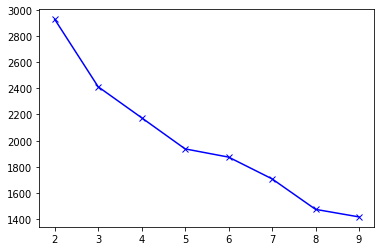

In [12]:
cost = []
for k in tqdm(range(2, 10)):
    model = KModes(n_clusters=k, init = "random", n_init = 5)
    model.fit_predict(cat)
    cost.append(model.cost_)

plt.plot(range(2, 10), cost, 'bx-')

In [ ]:
# We will try again with 3 cluster

Training

In [13]:
kmode = KModes(n_clusters=3, init = "random", n_init = 3)
clusters = kmode.fit_predict(cat)

In [15]:
df_pred = cat.copy()
df_pred["cluster"] = clusters 
df_pred.head()

,Education,Marital_Status,Kidhome,Teenhome,Complain,TotalAcceptedCmp,cluster
ID,,,,,,,
5524,Second,Single,0,0,0,1,2
2174,Second,Single,1,1,0,0,1
4141,Second,relationship,0,0,0,0,0
6182,Second,relationship,1,0,0,0,1
5324,Third,relationship,1,0,0,0,1


Analyze Cluster

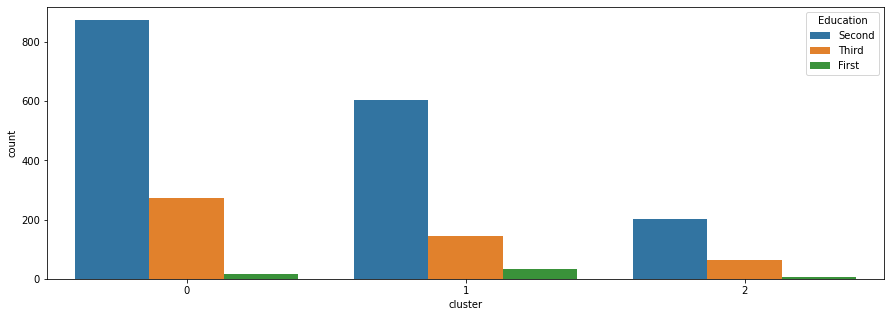

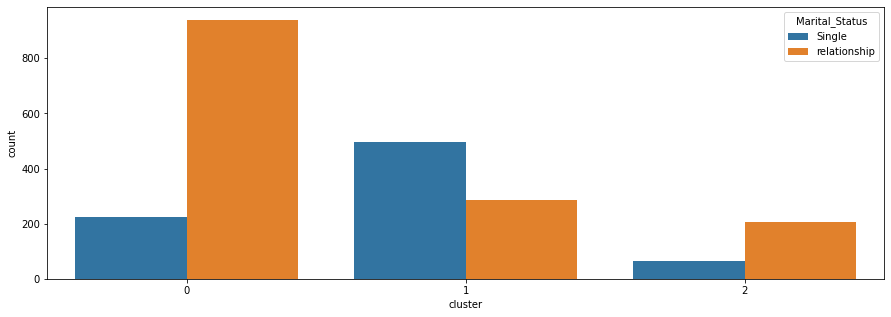

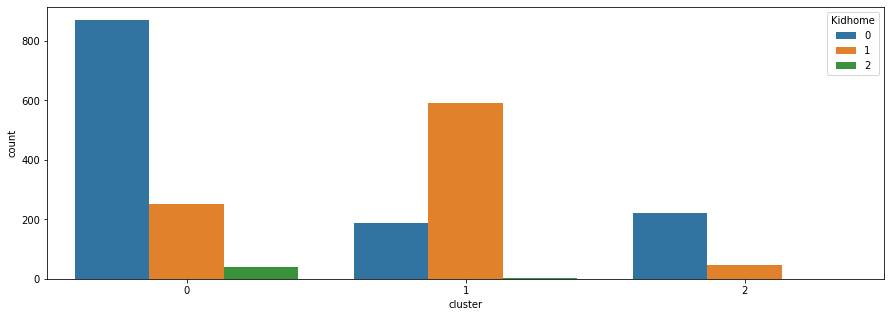

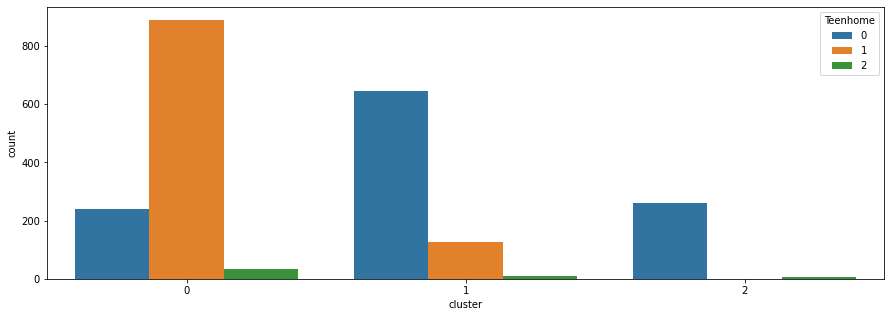

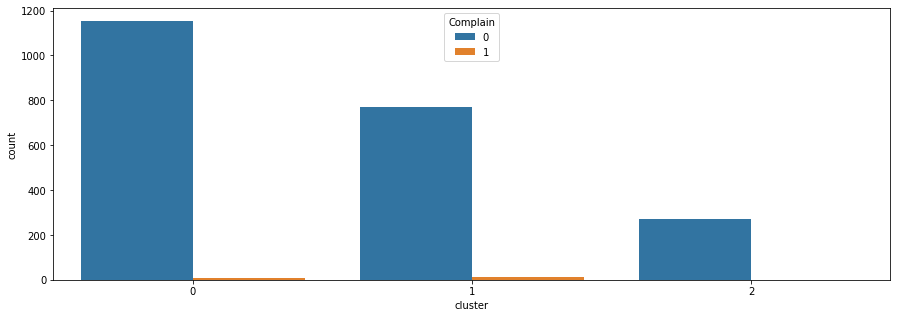

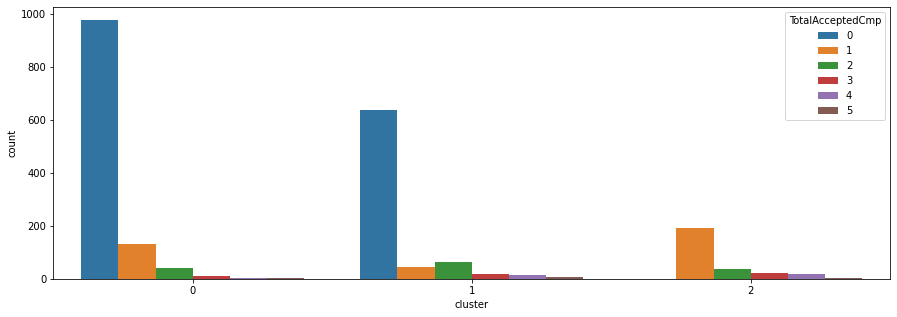

In [21]:
for col in cat.columns:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='cluster',hue=col, data = df_pred)
    plt.show()

In [28]:
pd.set_option('max_rows',None)
df_new = df_pred.copy()
df_new['cluster'] = df_pred.cluster
df_new.groupby('cluster').agg(['median' ,'mean'])

Kidhome           Teenhome  ...  Complain TotalAcceptedCmp          
         median      mean   median  ...      mean           median      mean
cluster                             ...                                     
0             0  0.286942        1  ...  0.008591                0  0.229381
1             1  0.763729        0  ...  0.014049                0  0.401022
2             0  0.174721        0  ...  0.000000                1  1.535316

[3 rows x 8 columns]